<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/Network_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMEANS CLUSTERING
1.   Load and Plot the dataset.
2.   Pre-process data as necessary.
3.   Apply Clustering technique, K-Mean.
4.   Share the findings along with a report.


In [ ]:
# Importing necessary modules which come installed in Google Collab.
import numpy as np # basic maths
import pandas as pd # for dataframe + python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # data visulization with steriods.

In [ ]:
# current datasets doesnot include header meaning columns labelling so we will import from assessment description Project1 https://courses.highered.tafensw.edu.au/mod/folder/view.php?id=982495
columns_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",

"wrong_fragment","urgent","hot","num_failed_logins","logged_in",

"num_compromised","root_shell","su_attempted","num_root","num_file_creations",

"num_shells","num_access_files","num_outbound_cmds","is_host_login",

"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",

"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",

"dst_host_diff_srv_rate","dst_host_same_src_port_rate",

"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",

"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df = pd.read_csv("Network_Anomaly.csv", header=None, names=columns_names) # header reads the rows for columns names and names overrides if we define own columns names

In [ ]:
# lets check if above attempt worked or not
df.head(10) # peeking top 10 rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


Successfully added the columns names for better analysis

In [ ]:
# lets do value count
df["attack"].value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
# we have multiple features and countless
df.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
# if there are present any null values or NaN
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
#lets check is there is any inconsistency in the count of data
pd.options.display.float_format = '{:.8f}'.format
# preserving scientific notation to peek minor mean, std value
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,...,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000
mean,287.14465004,45566.74300048,19779.11442134,0.00019846,0.02268740,0.00011113,0.20440888,0.00122248,0.39573559,0.27925032,...,115.65300501,0.52124169,0.08295111,0.14837886,0.03254245,0.28445246,0.27848452,0.11883181,0.12023989,19.50406039
std,2604.51530987,5870331.18189133,4021269.15143965,0.01408607,0.25352999,0.01436603,2.14996843,0.04523914,0.48901005,23.94204224,...,110.70274078,0.44894936,0.18892180,0.30899713,0.11256380,0.44478405,0.44566912,0.30655746,0.31945939,2.29150294
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,10.00000000,0.05000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,18.00000000
50%,0.00000000,44.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,63.00000000,0.51000000,0.02000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20.00000000
75%,0.00000000,276.00000000,516.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,...,255.00000000,1.00000000,0.07000000,0.06000000,0.02000000,1.00000000,1.00000000,0.00000000,0.00000000,21.00000000
max,42908.00000000,1379963888.00000000,1309937401.00000000,1.00000000,3.00000000,3.00000000,77.00000000,5.00000000,1.00000000,7479.00000000,...,255.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,21.00000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
# since we have multiple features we will share our findings in this manner
# first we will select two importance features for exploring and learning the kmeans in this dataset in respect to labelled data just for feature importance
# then we will try to scale 3 dimension
# atlast we will do all the features possibly with pca for data reduction since goal is to find the findings in manner to distance not for plot specifically

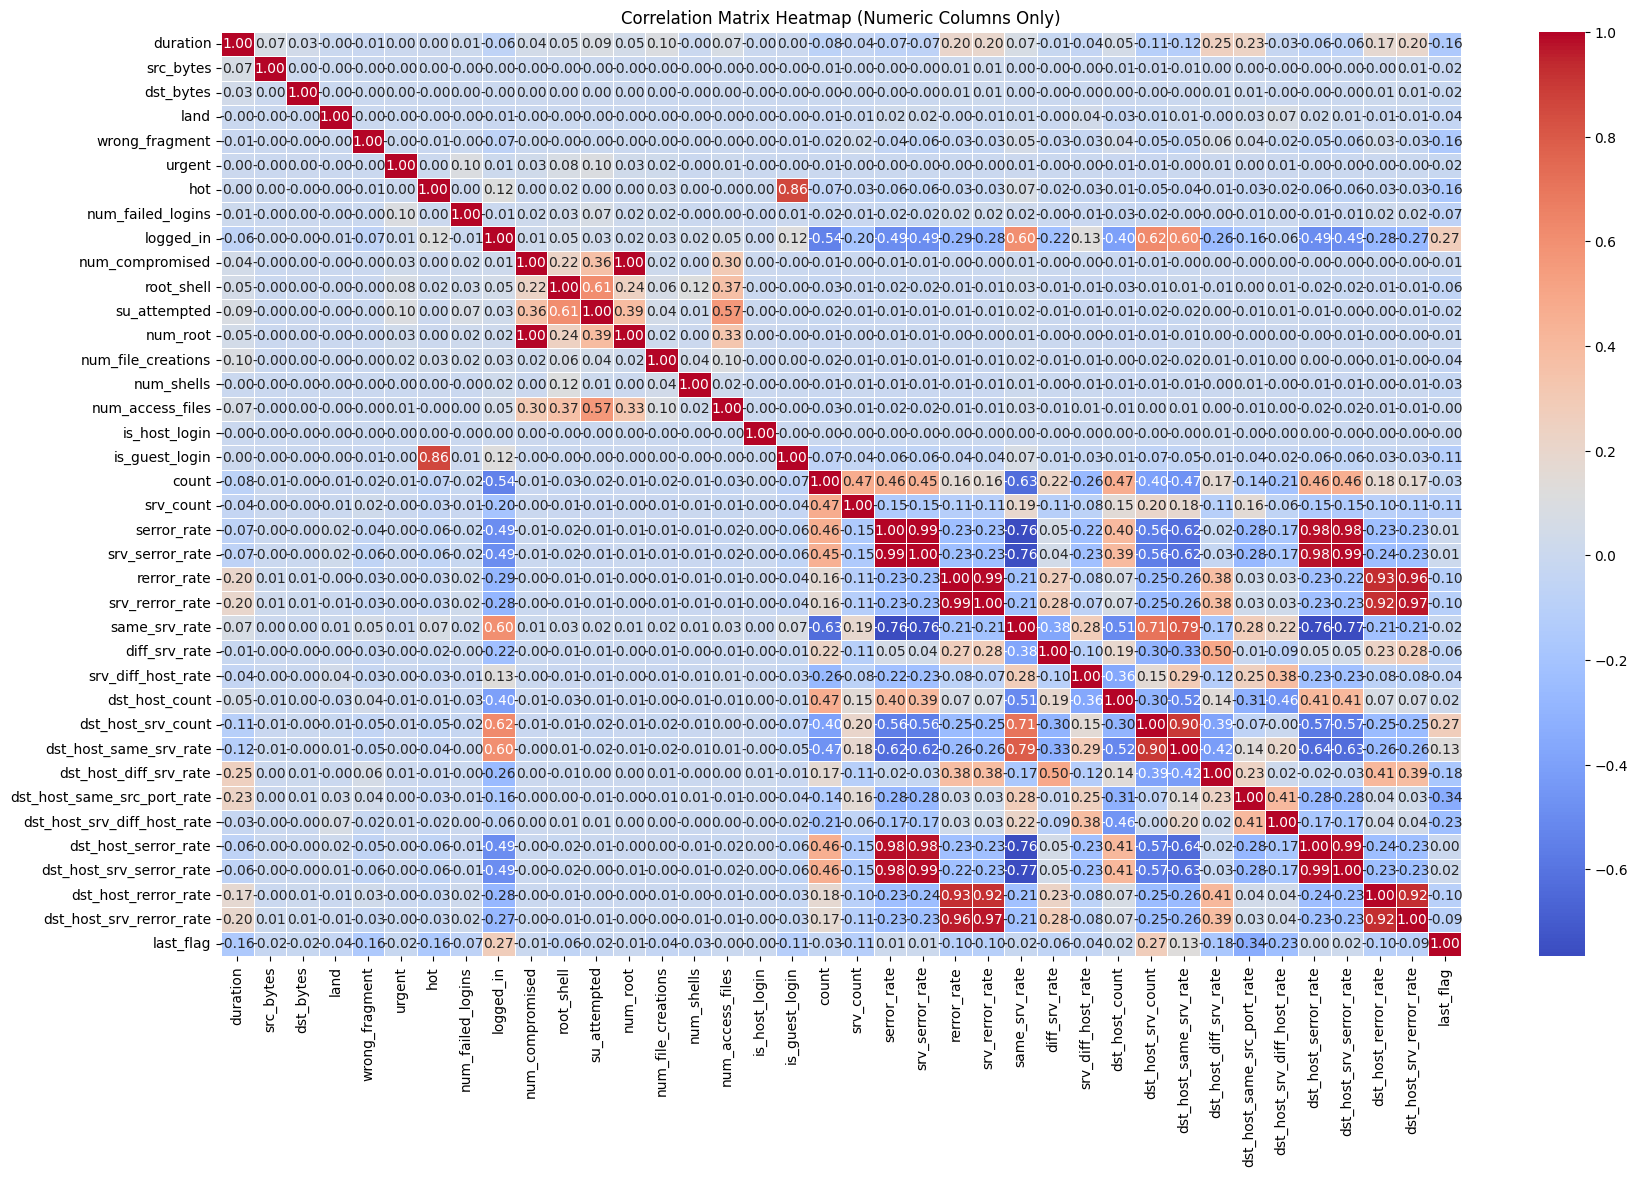

In [42]:
# only numeric columns
correlation_matrix= df.corr(numeric_only=True)

# lets plot the correaltion matric heatmap
plt.figure(figsize=(20, 12)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Numeric Columns Only)')
plt.show()


In [ ]:
df['num_outbound_cmds'].nunique()

1

In [ ]:
df['num_outbound_cmds'].value_counts() # dropped

,count
num_outbound_cmds,
0,125973


In [ ]:
# dropping a certain columns
df = df.drop('num_outbound_cmds', axis=1)